<b> Principal Component Analysis</b>
<table style="width:50%">
<tr>
  <th>Mouse</th>
  <th>Gene1</th>
  <th>Gene2</th>
  <th>Gene3</th>
  <th>Gene4</th>
</tr>
<tr>
  <th>1</th>
  <th>10</th>
  <th>6</th>
  <th>1.2</th>
  <th>5</th>
</tr>
<tr>
  <th>2</th>
  <th>11</th>
  <th>4</th>
  <th>9</th>
  <th>7</th>
</tr>
<tr>
  <th>3</th>
  <th>8</th>
  <th>5</th>
  <th>10</th>
  <th>6</th>
</tr>
<tr>
  <th>4</th>
  <th>3</th>
  <th>3</th>
  <th>2.5</th>
  <th>2</th>
</tr>
<tr>
  <th>5</th>
  <th>1</th>
  <th>2.8</th>
  <th>1.3</th>
  <th>4</th>
</tr>
<tr>
  <th>6</th>
  <th>2</th>
  <th>1</th>
  <th>2</th>
  <th>7</th>
</tr>
</table>

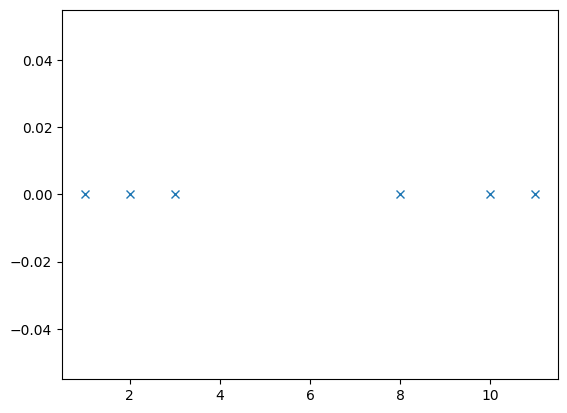

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
gene1 = [10,11,8,3,1,2]
y_values = [0,0,0,0,0,0]
plt.plot(gene1,np.zeros_like(gene1)+y_values, 'x')


In [ ]:
gene2 = [6,4,5,3,2.8,1]
gene3 =[1.2,9,10,2.5,1.3,2]
gene4 = [5,7,6,2,4,7]

<ul>
  <li> PCA can tell us which gene or variable is the most valuable for clustering data</li>
  <li> For example, PCA could tell us that gene3 is responsible for separating samples along the X-axis</li>
</ul>


To understand PCA we will consider the dataset with only two genes.

<function matplotlib.pyplot.show(close=None, block=None)>

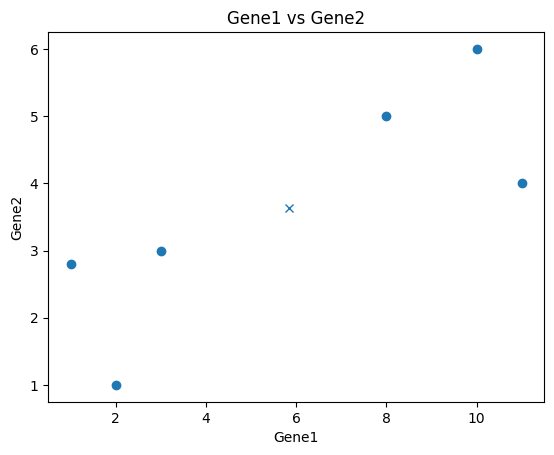

In [ ]:
plt.scatter(gene1,gene2)
plt.title("Gene1 vs Gene2")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
gene1_average = np.average(gene1)
gene2_average = np.average(gene2)
plt.plot(gene1_average,gene2_average, 'x',)
plt.show

<ul>
<li> Next calculate the average measurement for <b>Gene1</b> and the average measurement for <b>Gene2</b></li>
<li> With the average values we can calculate the centre of the data</li>
<li> From this point, we will focus on what happens in the graph, we no longer need the original data</li>
<li> We will shift the data so that the center is at the origin</li>
</ul>

In [ ]:
gene1 = gene1 - gene1_average
gene2 = gene2 - gene2_average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


<function matplotlib.pyplot.show(close=None, block=None)>

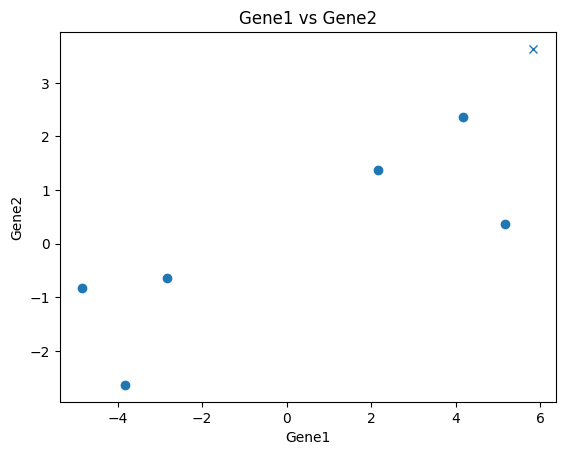

In [ ]:
plt.scatter(gene1,gene2)
plt.title("Gene1 vs Gene2")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
plt.plot(gene1_average,gene2_average, 'x',)
plt.show

<ul>
  <li> Shifting the data did not change how the data points are positioned relative to each other</li>
  <li> Now that the data is centered at the originwe can try to fit a line to it</li>
  <li>Start with a random line through the origin and rotate until it fits as good as possible </li>

  <li> We need to talk about how PCA decides if a fit is good or not </li>
  <li> Consider the starting random line through the original </li>
  <li> We want to quantify how good this line fits the data, PCA project the data onto it and then can either measure the distances from the data to the line and try to find the line that minimizes those distances</li>
<li> It can try to find the line that maximises the distances from the projected points to the origin </li>
<li> $a^2 = b^2$ since $a$ is fixed as $b$ gets bigger $c$ must get smaller and vice versa</li>
<li> PCA can either minimise $b$ or maximise $c$ </li>
<li> Intuitively it is more obvious to minimize $b$... But is much easier to calculate $c$, the distance from the projected point to the origin, so PCA funds the best line by maximising the sum of squared distances from the projected points to the origin </li>
<li> Rotate the line to find the largest SS(Distances) </li>
<li> This line is called Principal Component 1 or PC1 for short </li>

</ul>

In [ ]:
from scipy import stats
slope, intercept, _, _, _ = stats.linregress(gene1,gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


<ul>
<li> PC1 has a slope of $\frac{1}{3}$. In other words for every 3 units that we go along the gene1 axis we go up 1 unite in the gene2 axis.</li>
<li>This means that the data is mostly spread out along the gene1 axis.. and only a little bit spread out along the gene2 axis</li>
<li> To make PC1 mix 3 parts gene1 and 1 part gene2</li>
<li> The ratio of gene1 to gene2 tells you that gene1 is much more imporant when it comes to describing how the data is spread out</li>
<li> PC1 is a linear combination of gene1 and gene2</li>
<li> When you do PCA with Singular Value Decomposition (SVD) the recipe for PC1 is scaled so that its length is 1 </li>
<li>$PC1 = \frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$</li>
</ul>

<ul>
<li> The unit vector is called the Singular vector of the eigenvector for PC1</li>
<li> The proportions of each gene are called "Loading Scores"</li>
<li> PCA calls the average of the SS(distances) for the best fit line the eigenvalue for PC1</li>
<li> $\frac{SS(Distances for PC1)}{n-1} = Eigenvalue for PC1$</li>
<li>$\sqrt(SS(Distances for PC1)) = Singular value for PC1$</li>

<ul>
<li> Because this is only 2D, PC2 is just the line through the origin that is perpendicular to PC1</li>
<li> $PC2 = -1gene1 + 3gene2$</li>
<li> Scale to unit vector would give $PC2 =  \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$</li>
<li> For PC2 gene2 is 3 times as important as gene1</li>
<li> To draw the final PCA plot rotate everything so that PC1 is horizontal. Then see where the points end up</li>
<li> Eigenvalues are measures of variation </li>
<li> Suppose the variaton for PC1 was 15 and PC2 was 3. Total variation is 18</li>
<li> This means PC1 explains 15\18 or 83% of the variance </li>
<li> A scree plot is a graphical representation of the percentages of variation that each principal component account for</li>
</ul>


<b> PCA with 3 variables </b>
<ul>
<li> center the data </li>
<li> Find the line of best fit that goes through the origin - PC1 </li>
<li> $PC1 = 0.62gene1 + 0.15gene2 + 0.77gene3$ </li>
<li> PC2 is the next best fitting line that goes through the origin and it at right angle to PC1 </li>
<li> $PC2 = 0.77gene1 + 0.62gene2 + 0.15gene3$</li>
<li> PC3 is the best fitting line through the origin is at right angles to PC1 and PC2</li>
</ul>


<ul>
<li> In there , there is one PC per gene or (variable) but in practice the number of principal components is either the number of variables or number of samples, whichever is smaller</li>
<li> Once we have all the PCs, you can use the Eigenvalues to determine the proportion of variation that PC accounts for</li>
<li> Suppose that PC1 accounts for 79% of the variation , PC2 accounts for 15% of the variation, PC3 6%. </li>
<li> PC1 and PC2 account for most of the variation. A 2D graph using just PC1 and PC2 would be a good approximation </li>

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


In [ ]:
genes = ['gene'+str(i) for i in range(1,101)]
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]


In [ ]:
data = pd.DataFrame(columns=[*wt, *ko],index=genes)
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rnd.randrange(10,1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rnd.randrange(10,1000), size=5)

In [ ]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,838,812,790,861,850,683,681,688,667,674
gene2,801,721,805,778,778,505,555,527,462,515
gene3,807,769,854,789,763,527,517,530,491,462
gene4,527,499,508,467,478,500,476,526,491,491
gene5,372,379,370,416,369,621,598,617,617,605


In [ ]:
scaled_data = preprocessing.scale(data.T)

In [ ]:
pca = PCA()

In [ ]:
pca.fit(scaled_data)

PCA()

In [ ]:
pca_data = pca.transform(scaled_data)

In [ ]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
per_var

array([89.1,  3. ,  2. ,  1.6,  1.4,  1.2,  0.8,  0.5,  0.4,  0. ])

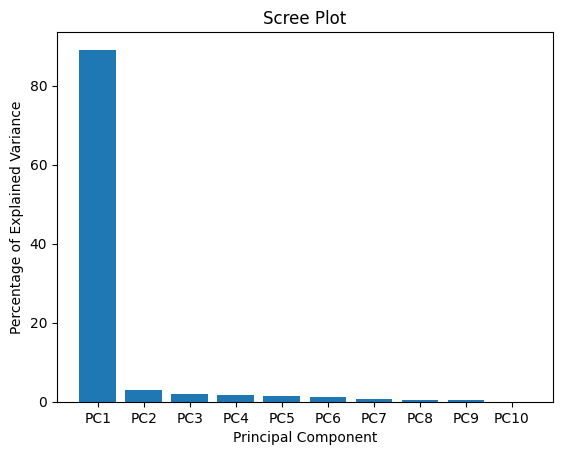

In [ ]:
labels = ["PC" + str(i) for i in range(1, len(per_var) + 1)]

# Assuming 'per_var' is already defined and contains the percentage of variance
# for each principal component
plt.bar(x=range(1, len(per_var) + 1), height=per_var)

plt.xticks(range(1, len(per_var) + 1), labels)  # Set the x-axis tick labels
plt.ylabel('Percentage of Explained Variance')  # Set the y-axis label
plt.xlabel('Principal Component')  # Set the x-axis label
plt.title('Scree Plot')  # Set the title of the plot

plt.show()  # Display the plot


In [ ]:
pca_df = pd.DataFrame(pca_data, index=[*wt,*ko], columns = labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.534745,-2.871594,0.757426,-0.501347,0.984969,0.131526,-1.473009,0.357846,-0.643154,4.710999e-16
wt2,-9.542043,0.429063,-1.086102,-0.408368,1.833114,-0.855838,0.058155,-0.754787,1.085707,3.252706e-16
wt3,-9.212364,-2.074197,1.761757,0.408315,-1.182384,0.485633,1.626446,0.024664,0.391091,2.797143e-16
wt4,-9.627612,3.074377,0.502440,0.307210,-0.111296,-1.511164,0.349466,0.909172,-0.620855,7.784820e-16
wt5,-9.262438,1.390027,-1.952607,0.125921,-1.599060,1.756354,-0.532253,-0.565629,-0.217956,3.582191e-16
ko1,9.267323,-0.680333,-1.938995,0.852882,1.531437,1.014452,0.997199,0.925436,-0.259801,5.290526e-16
ko2,9.522167,0.341478,0.166218,-1.985042,-1.086307,0.086282,-0.632619,1.066792,0.860732,3.911717e-16
ko3,9.246044,-0.575240,0.113202,2.858360,-0.833368,-0.992792,-0.913145,-0.220137,0.332885,2.383682e-16
ko4,9.316981,2.049866,2.543798,-0.137549,1.145525,1.251808,-0.090480,-0.752063,-0.183553,-7.571152e-17
ko5,9.826687,-1.083448,-0.867137,-1.520382,-0.682630,-1.366263,0.610240,-0.991292,-0.745096,-9.112314e-17


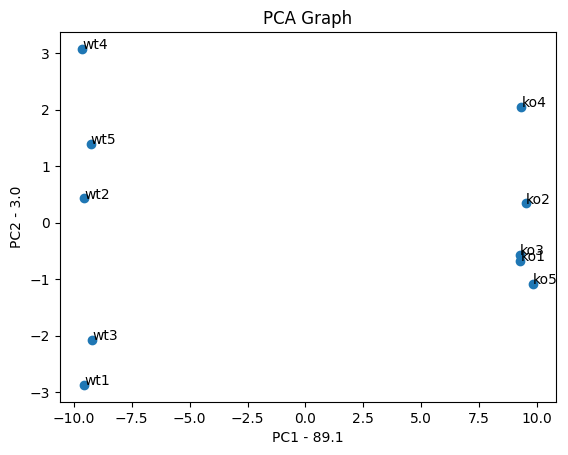

In [ ]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')
for sample in pca_df.index:
  plt.annotate(sample,(pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
load_scores = pd.Series(pca.components_[0], index=genes)
load_scores

gene1     -0.102936
gene2     -0.103103
gene3     -0.103927
gene4      0.002321
gene5      0.104998
gene6     -0.100791
gene7      0.105570
gene8      0.105925
gene9     -0.104000
gene10    -0.105707
gene11    -0.105815
gene12    -0.105822
gene13     0.104646
gene14     0.105264
gene15     0.105586
gene16     0.105550
gene17    -0.086103
gene18    -0.105876
gene19    -0.103370
gene20     0.103191
gene21    -0.105476
gene22    -0.105470
gene23    -0.105042
gene24    -0.105717
gene25     0.105601
gene26    -0.105018
gene27     0.105485
gene28     0.090025
gene29    -0.093072
gene30     0.105506
gene31    -0.104947
gene32    -0.071449
gene33     0.105635
gene34    -0.105113
gene35     0.103301
gene36    -0.101007
gene37     0.090661
gene38    -0.017677
gene39     0.105344
gene40    -0.105679
gene41    -0.095508
gene42     0.105334
gene43    -0.104169
gene44     0.105719
gene45     0.105780
gene46    -0.094863
gene47    -0.105557
gene48     0.105846
gene49    -0.099550
gene50    -0.103582


In [ ]:
sorted_loading_scores = load_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(load_scores[top_10_genes])

gene8     0.105925
gene51    0.105906
gene63   -0.105891
gene18   -0.105876
gene96    0.105861
gene48    0.105846
gene12   -0.105822
gene61    0.105817
gene11   -0.105815
gene71    0.105796
dtype: float64
